# Simple convolution examples

## import relevant packages


In [2]:
# import relevant packages
%matplotlib inline 
#notebook

import torch                        # for Tensor creation
import torch.nn.functional as F     # for convolution, subsampling operations
from torch.autograd import Variable # import the backend for automatic gradient calculation

from skimage import io # for image input/output
import numpy as np     # convenient matrix, tensor-like operations
import matplotlib.pyplot as plt     # plotting tool
plt.rcParams['image.cmap'] = 'gray' # default colormap as gray

## API to display image

In [3]:
# API to plot the list of images
def display_images(imgs):
    fig = plt.figure()
    
    # parse through each image and add a subplot
    for i, img in enumerate(imgs):
        subplot = fig.add_subplot(1,len(imgs),i+1)
        subplot.imshow(img)
        subplot.axis('off')
    
    # show the image
    plt.axis('off')        
    plt.show()
    

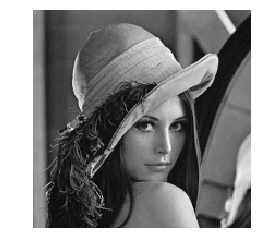

In [4]:
# read the original image and plot
original_lena = io.imread('./pics/conv/lena.png')
display_images([original_lena])

## API to convolve the image with the filter

  1.  convert the numpy image and numpy kernel to torch image (`torch.from_numpy()`) with appropriate `unsqueeze()`
  2.  convolve using `torch.nn.functional.conv2d()` 
  3.  `squeeze()` the '1' dimensions

In [5]:
# API to convolve the give image and kernel

def convolve(img, kernel):
    # img - gray scale image
    # kernel - kernel to be convolved with
    
    # 1. convert the numpy image and numpy kernel to torch image (`torch.from_numpy()`) with appropriate `unsqueeze()`
    torch_img = torch.from_numpy(img).unsqueeze(0).unsqueeze(0).float()
    torch_kernel = torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0).float()
    
    # 2.  convolve using `torch.nn.functional.conv2d()` 
    conv_output = F.conv2d(Variable(torch_img), weight=Variable(torch_kernel), padding=1)
    
    # 3. `squeeze()` the '1' dimensions
    numpy_image = conv_output.data.squeeze().numpy()
    return numpy_image

## API to normalize an array to be within 0 and 1

In [6]:
def normalize_image(img):
    # divide the image by max value and return
    return img / np.max(img)

## API to convolve and show the output image

  1. call the `convolve()` function to get the convolved output
  2. Threshold the output (usually neglect the negative values - equivalent to ReLU())
  3. Normalize the values to show as an image (needed as 0 ... 1 by skimage)
  4. display original image and convolution output

In [7]:
# API to convolve the image and show output

def convolve_kernel_and_show_output(img, kernel):
    # img - gray scale image
    # kernel - kernel to be convolved with
    
    # 1. call the `convolve()` function to get the convolved output
    output_image = convolve(img, kernel)

    #2. Threshold the output (usually neglect the negative values - equivalent to ReLU())
    output_image[output_image<0] = 0

    # 3. Normalize the values to show as an image (needed as 0 ... 1 by skimage)
    output_image = normalize_image(output_image)

    # 4. display original image and convolution output
    display_images([original_lena, output_image])
    
    return output_image

## Vertical edge detector

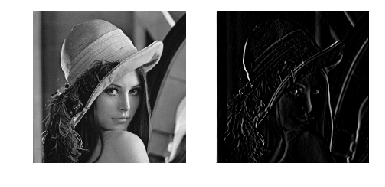

In [8]:
kernel = np.array([[-1, 0, 1],
                   [-3, 0, 3],
                   [-1, 0, 1]])

# convolution of the image with the kernel
convolve_kernel_and_show_output(original_lena, kernel);


## Horizontal edge detector

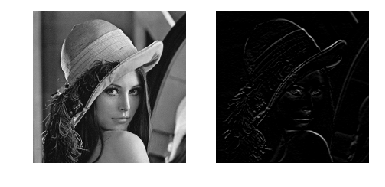

In [9]:
kernel = np.array([[-1, -3, -1],
                   [0, 0, 0],
                   [1, 3, 1]])

# convolution of the image with the kernel
convolve_kernel_and_show_output(original_lena, kernel);


## Main diagonal edge detector

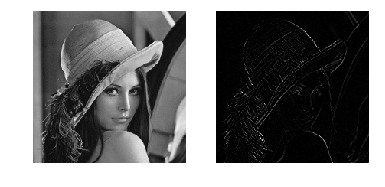

In [10]:
kernel = np.array([[6, -3, -3],
                   [-3, 6, -3],
                   [-3, -3, 6]])

# convolution of the image with the kernel
convolve_kernel_and_show_output(original_lena, kernel);

## Reverse diagonal edge detector

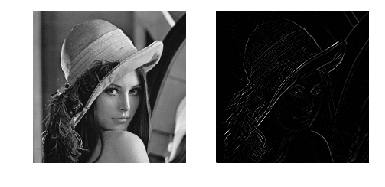

In [11]:
kernel = np.array([[-3, -3, 6],
                   [-3, 6, -3],
                   [6, -3, -3]])

# convolution of the image with the kernel
convolve_kernel_and_show_output(original_lena, kernel);

## Sharpening the image with Edge detector

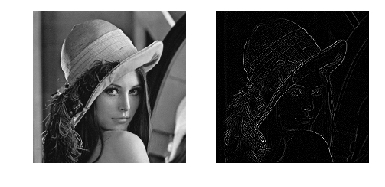

In [12]:
kernel = np.array([[0, 2, 0],
                   [2, -8, 2],
                   [0, 2, 0]])

# convolution of the image with the kernel
convolved_image = convolve_kernel_and_show_output(original_lena, kernel)

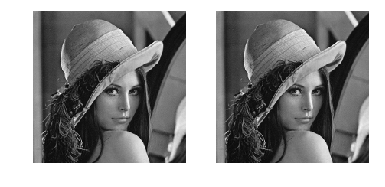

In [13]:
# add the edge image with original image to bring the sharpened effect
sharpened_image = normalize_image(original_lena + convolved_image)
display_images([original_lena, sharpened_image])